# Foundations for inference

Statistical inference is concerned with understanding and  drawing conclusions out of data. Relying on the quality of parameter estimates.

**N.B : ** We are going to work on the yrbss file sample used in the book.  The data were retrieved through the website : https://www.cdc.gov/healthyyouth/data/yrbs/data.htm, and focused and the 2013 survey to match the datas from the book

## 4.1 Variability in estimates

We want to try to estimate some features out of the YRBSS file using **samples** :

    1. The average height of high schoolers
    2. The average weight 
    3. How many days per week do they practice weight training

### Uploading the Yrbss file

In [1]:
import pandas as pd
import numpy as np

**N.B :** The data have been formatted and cleaned to meet the book example. Look at the process in the separate file.<br/>
**cf :** https://github.com/chikoungoun/OpenIntro/blob/master/Chapter%204/Yrbss_file_formatting.ipynb

In [2]:
df = pd.read_csv('../Dataset/yrbss_2013.csv',index_col=0)
df.head(15)

,age,gender,grade,height,weight,helmet,active,lifting
0,12.0,male,10.0,1.75,65.77,never,1.0,0.0
1,12.0,male,12.0,1.70,54.89,never,2.0,1.0
2,12.0,male,9.0,1.73,65.77,never,1.0,7.0
3,13.0,male,9.0,1.78,55.79,always,1.0,6.0
4,13.0,male,9.0,1.73,82.56,always,2.0,0.0
5,13.0,male,9.0,1.78,65.77,never,1.0,7.0
6,13.0,male,9.0,1.75,88.45,never,2.0,6.0
7,14.0,male,9.0,1.60,54.43,never,2.0,4.0
8,14.0,male,9.0,1.60,54.43,most of the time,2.0,3.0
9,14.0,male,9.0,1.78,66.23,never,1.0,3.0


### 4.1.1 Point estimates

Generally speaking, a point estimate is a statistic parameter (mean, variance, standard deviation,...) used to estimate a parameter in a population, usually applied on samples. 

Usually, estimates vary from a sample to another depending on the sample observations. We call this difference a **sampling variation**. The estimate won't be exactly equal to the population parameter, but will be very close to it.

* **histograms of <i>weight, height, active</i> and <i>lifting</i>**

Creating a sample of 100 observations from the dataframe

In [3]:
sampl = df.sample(n=100)

In [4]:
sampl.head()

,age,gender,grade,height,weight,helmet,active,lifting
8806,16.0,female,11.0,1.70,61.24,never,2.0,4.0
9670,17.0,female,12.0,1.63,62.14,sometimes,2.0,0.0
7125,15.0,female,10.0,1.63,72.58,never,2.0,4.0
10031,17.0,female,12.0,1.57,63.50,not riding,2.0,0.0
940,15.0,male,9.0,1.78,63.50,never,2.0,0.0


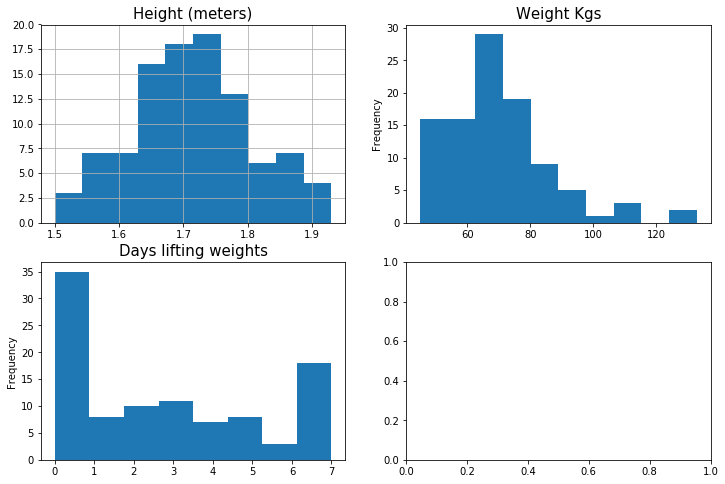

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axarr = plt.subplots(2,2,figsize=(12,8))

#Distribution of height 
sampl['height'].hist(ax=axarr[0][0],)
axarr[0][0].set_title("Height (meters)", fontsize=15)

#Distribution of weight
sampl['weight'].plot.hist(ax=axarr[0][1])
axarr[0][1].set_title("Weight Kgs", fontsize=15)

#Distribution of physical activity in Past week
sampl['lifting'].plot.hist(ax=axarr[1][0],bins=8)
axarr[1][0].set_title("Days lifting weights", fontsize=15)

We will display another randomly selected sample to pinpoint the differences of result

In [6]:
sampl2 = df.sample(n=100)
sampl2.head()

,age,gender,grade,height,weight,helmet,active,lifting
4207,17.0,male,11.0,1.80,83.92,never,2.0,5.0
11075,18.0,female,12.0,1.65,54.43,not riding,2.0,0.0
9979,17.0,female,11.0,1.52,49.90,not riding,2.0,3.0
5808,14.0,female,9.0,1.57,60.33,never,2.0,2.0
3509,17.0,male,12.0,1.70,70.31,most of the time,1.0,7.0


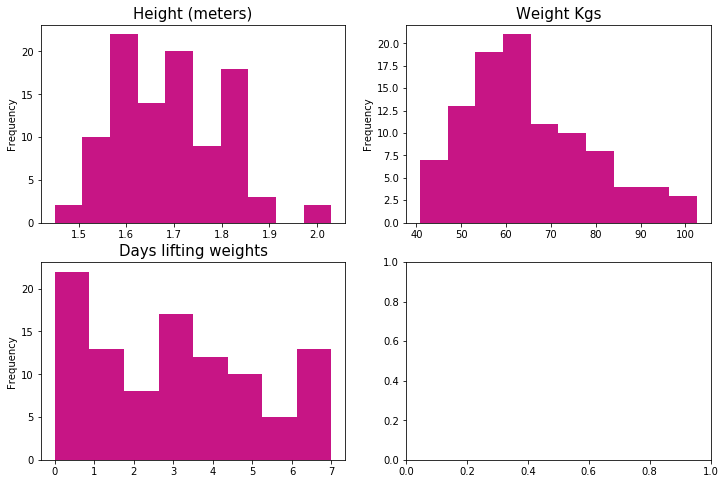

In [7]:
fig, axarr = plt.subplots(2,2,figsize=(12,8))

#Distribution of height 
sampl2['height'].plot.hist(ax=axarr[0][0],color='mediumvioletred')
axarr[0][0].set_title("Height (meters)", fontsize=15)

#Distribution of weight
sampl2['weight'].plot.hist(ax=axarr[0][1],color='mediumvioletred')
axarr[0][1].set_title("Weight Kgs", fontsize=15)

#Distribution of physical activity in Past week
sampl2['lifting'].plot.hist(ax=axarr[1][0],bins=8, color='mediumvioletred')
axarr[1][0].set_title("Days lifting weights", fontsize=15)

- The **height** distribution is somehow symetric in it's shape ( very somehow :p) 
- We can notice in the 2 examples that the **weight** distribution is moderatly skewed to the right
- The **lifting** distribution is pretty similar

Let's calculate the average **weight** and **lifting days**  of the samples :

In [8]:
# sample mean of the weight
print(sampl['weight'].mean())
print(sampl2['weight'].mean())

69.4598
65.0012


In [9]:
# sample mean of the lifting days
print(sampl['lifting'].mean())
print(sampl2['lifting'].mean())

2.73
2.99


* We realize that the average of the samples don't differ that much. Here we compute informations over the population

In [10]:
df['weight'].agg(['mean','median','std'])

mean      67.903099
median    64.860000
std       16.956465
Name: weight, dtype: float64

In [11]:
df.lifting.agg(['mean','median','std'])

mean      2.967510
median    3.000000
std       2.575564
Name: lifting, dtype: float64

### 4.1.2 Point estimates are not exact

Estimates are not exactly equal to the truth but tend to get better as more data gets added in.

**Running mean** is a sequence of means that adds up by adding a new observation in its calculation

**N.B : ** We will be working with the weight instead of the days of activity 

* **Graphing a Running mean for <i> weight</i> sample**

In [12]:
# we will need a function that computes the sum
def sum(l):
    s = 0
    for i in l:
        s = s + i
    return s

In [13]:
# Calculating a running mean through "lists"
def running_mean(l):
    #convert the series into a list 
    t = l.tolist()
    
    #declaring a result list
    tr = []

    for c,i in enumerate(t[:-1]):
        tr.append(sum(t[0:c+1])/(c+1))
    
    #returning back a series
    return pd.Series(tr)
#P.S : will try to compute with rolling sometime

In [14]:
#Weight sample running mean
wsrm = running_mean(sampl['weight'])

In [15]:
wsrm.head(10)

0    61.240000
1    61.690000
2    65.320000
3    64.865000
4    64.592000
5    72.500000
6    69.854286
7    70.365000
8    67.787778
9    70.807000
dtype: float64

Graphing the **Running mean** of the weight data of the student sample

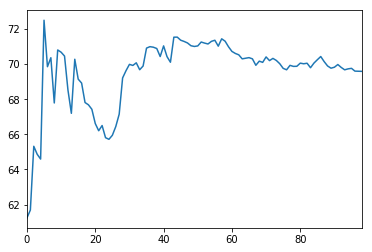

In [16]:
wsrm.plot.line()

In comparison with another sample 

In [17]:
wsrm2 = running_mean(sampl2['weight'])

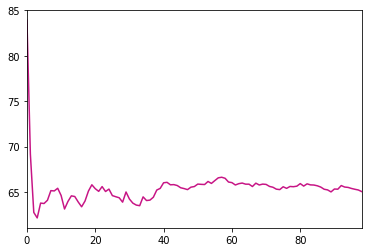

In [18]:
wsrm2.plot.line(color='mediumvioletred')

### 4.1.3 Standard error of the mean

**N.B: ** We will be using the <i>Lifting</i> data

Building up a **sampling distribution** for the sample mean when sample is size 100.

In [19]:
lift1k = []
i=0
while(i<1000):
    lift1k.append(df['lifting'].sample(100).mean())
    i += 1

In [20]:
len(lift1k)

1000

In [21]:
lift_dist = pd.Series(lift1k)

In [22]:
lift_dist.head()

0    3.16
1    3.00
2    3.44
3    2.94
4    2.78
dtype: float64

In [23]:
#Standard deviation of the sample mean
lift_dist.std()

0.24807608034964121

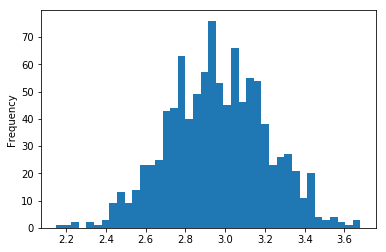

In [24]:
lift_dist.plot.hist(bins=40)

In [25]:
#Population mean
df['lifting'].mean()

2.967509659290481

Population mean $ \mu = 2.967$

In [26]:
#Population Standard deviation
df['lifting'].std()

2.5755635464492657

Population mean $ \sigma = 2.575$

* **Sampling Distribution** :<br/>
    Represents the distribution of the **point estimates** based on fixed sized samples from a certain population

The distribution looks **Unimodal**, approximately **symmetric** and it's centered very close to the **population mean** 

* **<u>Standard Error</u> ** <br/>
We call the standard deviation associated with an estimate as the **Standard Error**. It describes the typical error or uncertainty associated with the estimate.

* **Computing SE (Standard Error) for the sample mean**<br/>
Given <i>n</i> independant observations from a population with standard deviation $\sigma$ the standard error of the sample mean is equal to <br/><br/>
$SE = \frac{\sigma}{\sqrt{n}}$
<br/><br/>
To ensure sample observations independance, it shouldn't exceed 10% of the population <br/>
The estimate is sufficiently good enough when the sample size is at least 30 and the population, distribution not strongly skewed

**N.B : ** Difference between "Standard Deviation" and "Standard Error". As they are both a measure of spread, **Standard Deviation** uses **parameters** (population), and **Standard Error** uses **statistics** (sample) 

## 4.2 Confidence intervals

knowing that point estimate is rarely perfect, we tend to provide a plausible range of values for the parameter

### 4.2.1 Capturing the population parameter

A plausible range of values for the population is called a **confidence interval**

Think of it like fishing with a net (interval), rather than a spear (point estimate)

### 4.2.2 An approximate 95% confidence interval

The point estimate is the most plausible value of the parameter, so it is logical to construct the confidence interval around it.

To which we will associate the **Standard Error** that is a measure of the uncertainty of the **point estimate** (sample mean)

Roughly, 95% of the time the estimate will be within 1.96 standard errors of the parameter. In this case we say : <i> " We can be 95% **confident** that we have captured the true parameter "</i> <br/><br/>
&nbsp;&nbsp;&nbsp;&nbsp; $point \space estimate \pm 1.96 \times SE$

In other words it means that, if we take many samples and build a confidence interval from each sample with the equation, about 95% of those intervals would contain the population mean $ \mu $

In [27]:
""" TO-DO : Graphing Confidence Interval page (175)"""

' TO-DO : Graphing Confidence Interval page (175)'

<u>** Ex : ** Calculating an approximate 95% confidence for the average lifting days  per week for all the Yrbss students</u>

In [28]:
import math

In [29]:
# Calculating the population mean
lifting_mean = df['lifting'].mean()
lifting_mean

2.967509659290481

In [30]:
# Calculating the population standard deviation
lifting_std = df['lifting'].std()
lifting_std

2.5755635464492657

In [31]:
#Standard error function
def standard_error(sd, sample_size):
    return (sd/(math.sqrt(sample_size)))

In [32]:
# Calculating the Standard Error of a sample
se = standard_error(lifting_std,100)
se

0.25755635464492654

The 95 % Confidence interval is :

In [33]:
#95% Confidence Interval
def ci_95(mean, std, sample_size):
    z = 1.96
    
    standard_error(lifting_std,sample_size)
    ci_minus = lifting_mean - (z * se)
    ci_plus = lifting_mean + (z * se)
    ci = (ci_minus,ci_plus)
    return ci   

In [34]:
ci_95(lifting_mean,lifting_std,100)

(2.4626992041864249, 3.4723201143945372)

### 4.2.3 The sampling distribution for the mean

Plotting the distribution of 100 000 sample means

In [35]:
# Calculating the sample means
t =[]
i=0
while (i <100000):
    t.append(df['lifting'].sample(100).mean())
    i += 1
""" Yeah it's ridiculous, needs to be perfected"""

" Yeah it's ridiculous, needs to be perfected"

In [36]:
serie100k  = pd.Series(t)

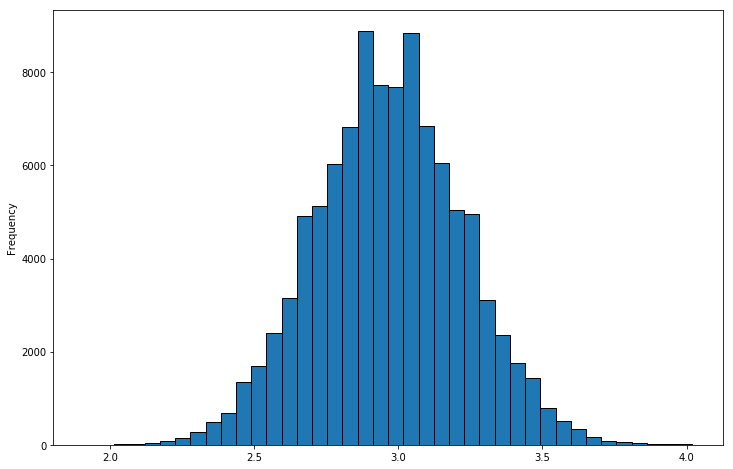

In [37]:
serie100k.plot.hist(bins=40,edgecolor='black',figsize=(12,8))

The distribution  of sample means closely resembles the normal distribution. We conclude that the distribution of sample means is nearly normal.

* **<u>Central Limit Theorem</u>**<br/>
If a sample consists of at least  independent observations and the data are not strongly skewed, then the distribution of the sample mean is well approximated by a normal model

### 4.2.4 Changing the confidence level

95% Confidence interval, means that about 95% of the time, observations are within 1.96 standard deviations from the mean

We might need other degrees of confidence level higher of lower. with this past example we had a taste for the 95% **confidence level**, which z-score is 1.96; but of course we can find others.

Each Confidence has it's equivalent z-score <br/><br/>
90% :  1.645 <br/>
95% : 1.96 <br/>
99% : 2.576 <br/>

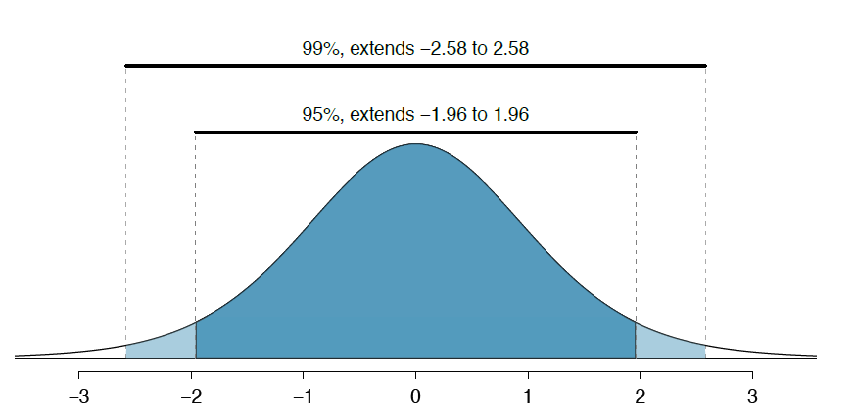

In [38]:
from IPython.display import Image
Image(filename="../img/confidence-level.png")

To create a 99% Confidence Interval all it needs to be done is to change 1.96 to 2.576 to the formula.

! **<u> Conditions for the sampling distribution being nearly normal and Standard Error accurate</u>**
<br/>
* The sample observations are independant
* The sample size is large : $\geqslant 30$
* The population distribution is not strongly skewed. Difficult to evaluate thou.

! **<u> How to verify sample observations are independant</u>**
<br/>
If the observations are from a simple random sample and consist of fewer than 10% of the population, then they are independant

* **Confidence interval for any confidence level** 
<br/>
<u>If the point estimate follows the normal model</u> with Standard Error SE, then a confidence interval for the population parameter is
<br/><br/>
&nbsp;&nbsp;&nbsp;&nbsp; $point \space estimate \pm z^* \times SE$

Where $z^*$ corresponds to the confidence level selected


* **Margin of error**
<br/>
In a confidence interval $z^* \times SE$​ is called the ** margin of error**

** N.B : ** Confidence intervals only attempt to capture population parameters

## 4.3 Hypothesis Testing

Uploading the 2011 yrbss file for comparison and hypothesis testing against the 2013 one on the average lifting days per week.

In [41]:
yrbss11 = pd.read_csv('../Dataset/yrbss_2011.csv',index_col=0)

Average lifting days for 2011 Yrbss population : 

In [44]:
#Lifting Mean Population 2011
lmp_2011 = yrbss11['lifting'].mean()
lmp_2011

3.0949403069926094

### 4.3.1 Hypothesis testing framework

We want to determine if the <u><i>2013 YRBSS</i></u> sample dataset provides strong evidence its students are **lifting more or less weights** than the <u><i>2011 YRBSS</i></u> students; Versus the other possibility that **there has been no change**.

**In other words :** Are the 2013 survey sample lifting more or less thant the 2011 population **OR** There are no changes

We simplify these options into competing hypothesis : 
    <br/>
* $H_0$ : The average days per week that YRBSS students lidfted weights was the same for 2011 and 2013
 <br/>
* $H_A$ : The average days per week that YRBSS students lifted weights was <i>different</i> for 2013 than in 2011
  <br/>  <br/>
We call $H_0$ the null hypothesis and $H_A$ the alternative hypothesis

* ** <u>Null and alternative hypothesis</u>**
  <br/>
The ** null hypothesis** ($H_0$) represents the commonly accepted fact or claim to be tested. The game is to try to reject it with coming up with an **alternative hypothesis** ($H_A$) that can explain a phenomenon.
  <br/>
 We can say that the null hypothesis represents a skeptical position of no difference. While the alternative hypothesis often represents a new perspective or the possibility of change